In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns; sns.set();

In [2]:
from sklearn.datasets import make_blobs

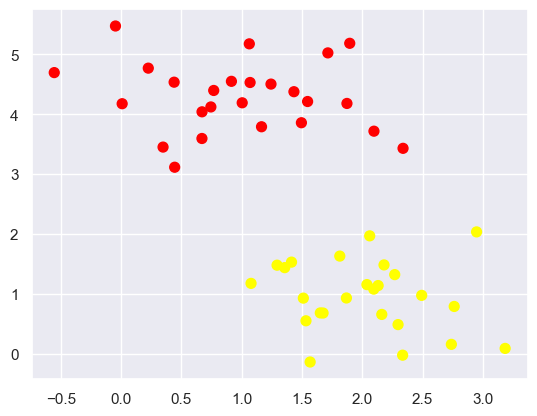

In [3]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

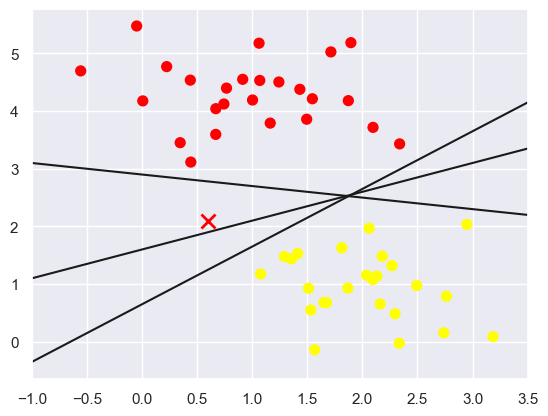

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)

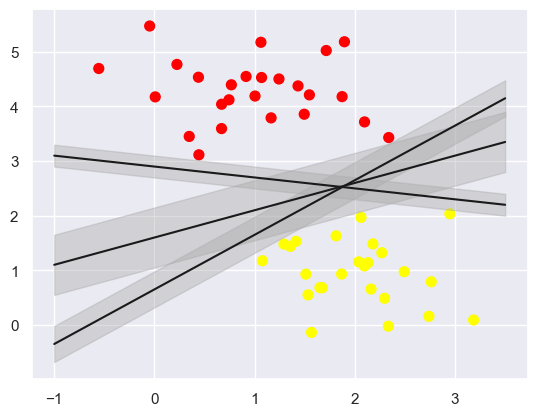

In [5]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

for m,b,d in [(1, 0.65, 0.33),(0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

In [6]:
from sklearn.svm import SVC

Support Vector Machines can be used for regression and classification task, in this case, the SVC is used as a classifier SVC stands for Support Vector Classifier

In [7]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

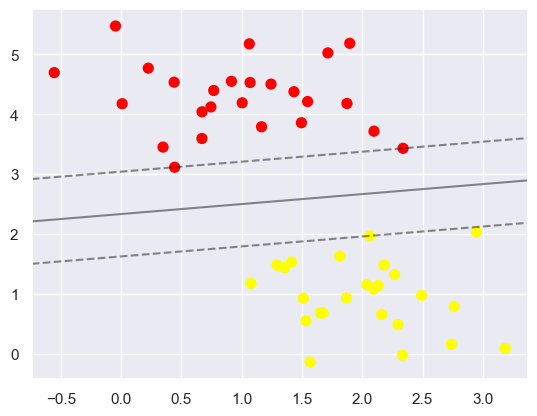

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

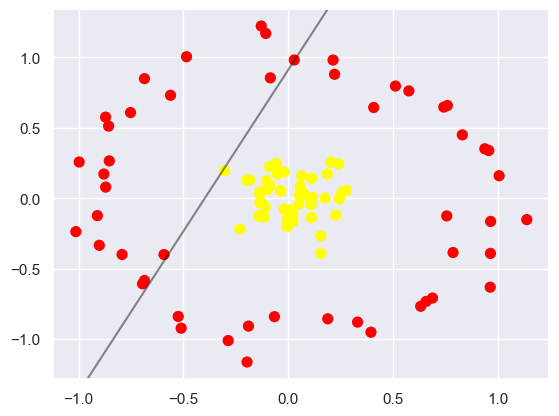

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [10]:
r = np.exp(-(X**2)).sum(1)

In [11]:
r

array([1.90764859, 1.3375803 , 1.21122589, 1.15460578, 1.2288354 ,
       1.2431198 , 1.96523394, 1.98695007, 1.93599301, 1.98346606,
       1.93675044, 1.99313854, 1.99647747, 1.55618423, 1.30074131,
       1.87436724, 1.9861768 , 1.93729686, 1.23436024, 1.38067502,
       1.54965609, 1.20781952, 1.99379847, 1.25295438, 1.95034544,
       1.99581161, 1.8958641 , 1.93497666, 1.83354258, 1.98419944,
       1.97749233, 1.22696258, 1.99331932, 1.96977782, 1.26114107,
       1.48903279, 1.96884186, 1.94261841, 1.06752056, 1.99365812,
       1.98972815, 1.11110105, 1.29992607, 1.96631279, 1.42149552,
       1.25870926, 1.18598049, 1.92395383, 1.46233221, 1.30376163,
       1.38631125, 1.96791111, 1.96546006, 1.98672303, 1.96913505,
       1.2784902 , 1.94527151, 1.24921546, 1.97248715, 1.41375921,
       1.22098396, 1.43224782, 1.33598077, 1.47456721, 1.96446852,
       1.40331473, 1.99581924, 1.4019175 , 1.96040691, 1.94328208,
       1.97954972, 1.50760587, 1.98357702, 1.31579865, 1.88631

In [12]:

from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')



In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

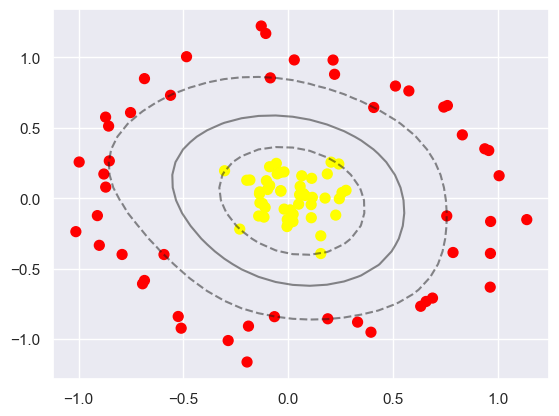

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:, 1],
           s=300, lw=1, facecolors='none')

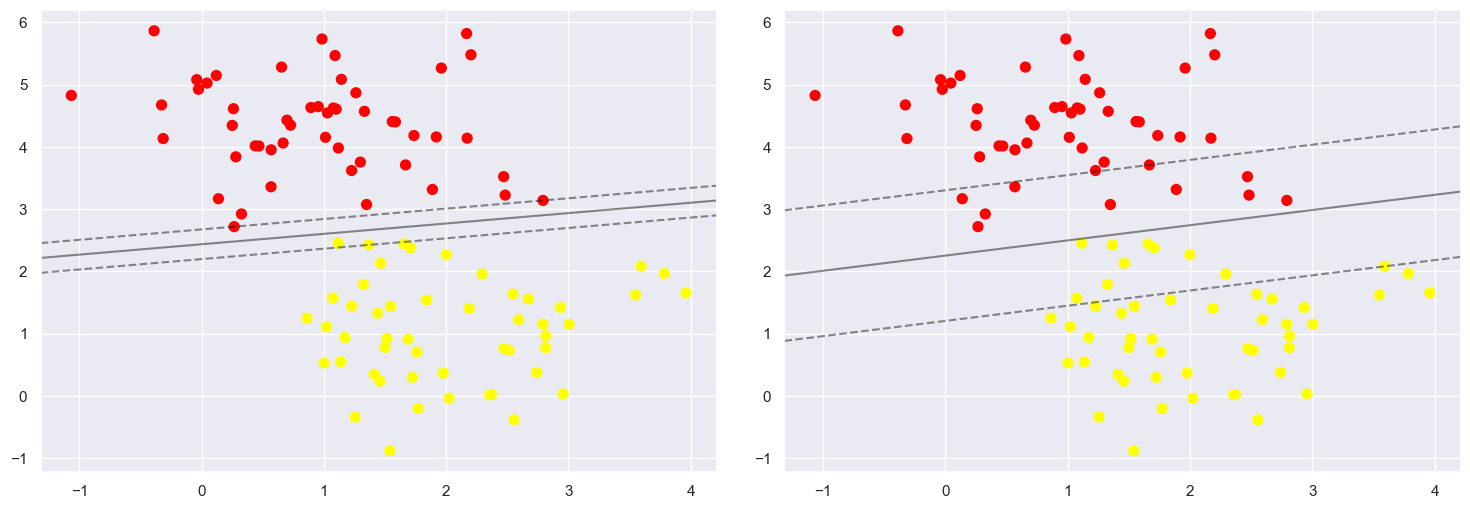

In [15]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1,2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model= SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none')
    